<a href="https://colab.research.google.com/github/yudintsev-sergey/Finish/blob/main/Out_Sound_gidro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Отключаем возможность использования GPU

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    #

Импортируем библиотеки

In [ ]:
import numpy as np
import math as ma
import matplotlib.pyplot as plt
import time
import tensorflow as tf
from tensorflow import keras
from keras.layers import Activation, Dense
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

Монтируем диск

In [ ]:
from google.colab import drive
drive.mount("/ShardDrives/")

Mounted at /ShardDrives/


Выбираем рабочую директорию, где сохранены файлы базы данных для анализа

In [ ]:
os.chdir('/ShardDrives/MyDrive/Colab Notebooks/Out/')

Засекаем время

In [ ]:
start = time.time()

Читаем файлы для обучения нейронной сети

In [ ]:
tmbr_base = np.load('tmbr_base.npy')
true_base = np.load('true_base.npy')

Делим общую базу на обучающую и тестовую часть

In [ ]:
n = ma.ceil(tmbr_base.shape[0] * 0.8)
m = tmbr_base.shape[0] - n
tmbr_train = tmbr_base[:n]
tmbr_test = tmbr_base[n:]
true_train = true_base[:n]
true_test = true_base[n:]

Строим модель

In [ ]:
model = keras.Sequential([
    Conv2D(8, (3,3), padding='same', activation='relu', input_shape=(16, 16, 1)),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])

Выводим структуру модели

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 8, 8)           0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 67034 (261.85 KB)
Trainable params: 67034 (261.85 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

Компилируем модель

In [ ]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
print("Компиляция завершена")

Компиляция завершена


Обучаем

In [ ]:
history = model.fit(tmbr_train, true_train, batch_size=128, epochs=50, validation_split=0.2, verbose = 1)

Epoch 1/50
12/12 [==============================] - 2s 58ms/step - loss: 36.3916 - accuracy: 0.2971 - val_loss: 17.7488 - val_accuracy: 0.2841
Epoch 2/50
12/12 [==============================] - 0s 32ms/step - loss: 12.0562 - accuracy: 0.3187 - val_loss: 10.4533 - val_accuracy: 0.2869
Epoch 3/50
12/12 [==============================] - 0s 29ms/step - loss: 6.2703 - accuracy: 0.3389 - val_loss: 5.1479 - val_accuracy: 0.3677
Epoch 4/50
12/12 [==============================] - 0s 29ms/step - loss: 3.6794 - accuracy: 0.3703 - val_loss: 4.2163 - val_accuracy: 0.3482
Epoch 5/50
12/12 [==============================] - 0s 31ms/step - loss: 3.2402 - accuracy: 0.3752 - val_loss: 3.4743 - val_accuracy: 0.3593
Epoch 6/50
12/12 [==============================] - 1s 83ms/step - loss: 2.5537 - accuracy: 0.4045 - val_loss: 2.3535 - val_accuracy: 0.3538
Epoch 7/50
12/12 [==============================] - 0s 37ms/step - loss: 2.4352 - accuracy: 0.4107 - val_loss: 2.5733 - val_accuracy: 0.3649
Epoch 8/5

Визуализируем

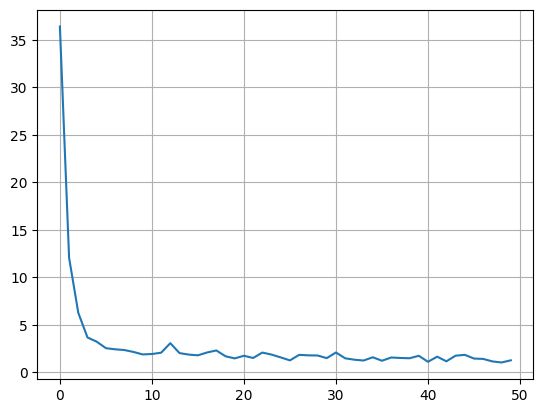

In [ ]:
plt.plot(history.history['loss'])
plt.grid(True)
plt.show()

Оцениваем

In [ ]:
results = model.evaluate(tmbr_test, true_test, batch_size=128)
print("test loss, test acc:", results)

4/4 [==============================] - 0s 7ms/step - loss: 2.9934 - accuracy: 0.4085
test loss, test acc: [2.9933547973632812, 0.4084821343421936]


Время работы алгоритма

In [ ]:
end = time.time()
print("Время работы алгоритма составило :", (end-start), "сек")

Время работы алгоритма составило : 144.5919153690338 сек
